In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("uber-raw-data-apr14.csv",index_col='Date/Time', parse_dates=['Date/Time'])

In [3]:
data.head()

,Lat,Lon,Base
Date/Time,,,
2014-04-01 00:11:00,40.7690,-73.9549,B02512
2014-04-01 00:17:00,40.7267,-74.0345,B02512
2014-04-01 00:21:00,40.7316,-73.9873,B02512
2014-04-01 00:28:00,40.7588,-73.9776,B02512
2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564516 entries, 2014-04-01 00:11:00 to 2014-04-30 23:48:00
Data columns (total 3 columns):
Lat     564516 non-null float64
Lon     564516 non-null float64
Base    564516 non-null object
dtypes: float64(2), object(1)
memory usage: 17.2+ MB


In [9]:
data['Date']= pd.DatetimeIndex(data.index).date
data['Weekday']= pd.DatetimeIndex(data.index).dayofweek
data['Hour']= pd.DatetimeIndex(data.index).hour
data['DayofMonth']= pd.DatetimeIndex(data.index).day
data['Day']= data[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)


In [11]:
data.tail()

,Lat,Lon,Base,Date,Weekday,Hour,DayofMonth,Day
Date/Time,,,,,,,,
2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30,2,23,30,Wednesday
2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30,2,23,30,Wednesday
2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30,2,23,30,Wednesday
2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30,2,23,30,Wednesday
2014-04-30 23:48:00,40.6880,-73.9608,B02764,2014-04-30,2,23,30,Wednesday


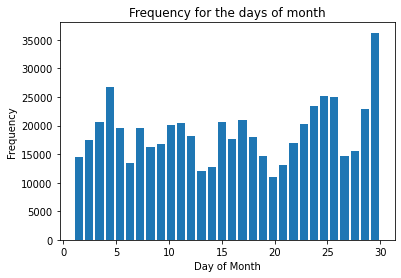

In [12]:
plt.hist(data.DayofMonth,bins=30,rwidth=0.8)
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.title("Frequency for the days of month")
plt.show()

In [13]:
for k,freq in data.groupby('DayofMonth'):
    print(k,len(freq))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


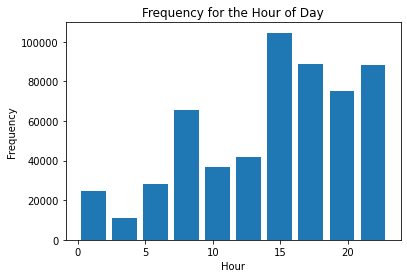

In [14]:
plt.hist(data.Hour,rwidth=0.8)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title("Frequency for the Hour of Day")
plt.show()

In [15]:
for k,freq in data.groupby('Hour'):
    print(k,len(freq))
    

0 11910
1 7769
2 4935
3 5040
4 6095
5 9476
6 18498
7 24924
8 22843
9 17939
10 17865
11 18774
12 19425
13 22603
14 27190
15 35324
16 42003
17 45475
18 43003
19 38923
20 36244
21 36964
22 30645
23 20649


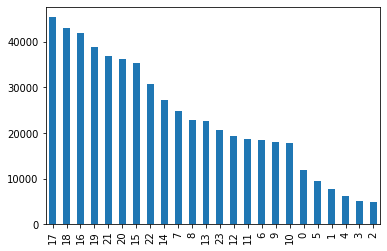

In [16]:
h1=data['Hour'].value_counts()
h1.plot(kind= 'bar')

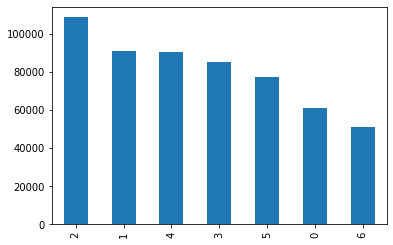

In [17]:
w1=data['Weekday'].value_counts()
w1.plot(kind= 'bar')

In [18]:
combined_hr_wk=data.groupby('Weekday Hour'.split()).count()

In [19]:
combined_hr_wk

Lat   Lon  Base  Date  DayofMonth   Day
Weekday Hour                                          
0       0      518   518   518   518         518   518
        1      261   261   261   261         261   261
        2      238   238   238   238         238   238
        3      571   571   571   571         571   571
        4     1021  1021  1021  1021        1021  1021
...            ...   ...   ...   ...         ...   ...
6       19    2579  2579  2579  2579        2579  2579
        20    2276  2276  2276  2276        2276  2276
        21    2310  2310  2310  2310        2310  2310
        22    1639  1639  1639  1639        1639  1639
        23    1018  1018  1018  1018        1018  1018

[168 rows x 6 columns]

In [28]:
combineddf = pd.pivot_table(data,columns= ['Weekday','Hour'],aggfunc='count')
combineddf

     Weekday  Hour
Lat  0        0        518
              1        261
              2        238
              3        571
              4       1021
                      ... 
Day  6        19      2579
              20      2276
              21      2310
              22      1639
              23      1018
Length: 1008, dtype: int64

In [21]:
def  count_rows(x):
    return len(x)

In [22]:
df1=data.groupby('Weekday Hour'.split()).apply(count_rows)
df1

Weekday  Hour
0        0        518
         1        261
         2        238
         3        571
         4       1021
                 ... 
6        19      2579
         20      2276
         21      2310
         22      1639
         23      1018
Length: 168, dtype: int64

In [23]:
df2=df1.unstack()
df2

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


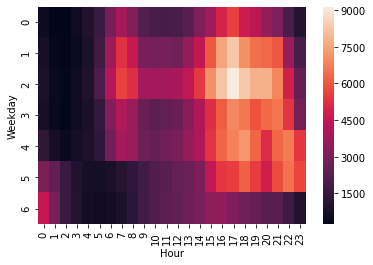

In [24]:
sns.heatmap(df2)


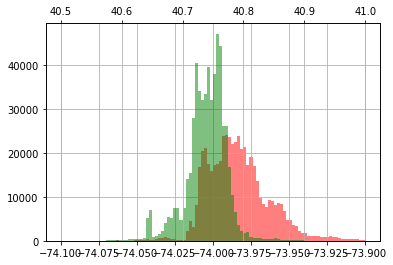

In [25]:
plt.hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='r',alpha=.5,label='Longitude')
plt.grid()
plt.twiny()
plt.hist(data['Lat'],bins=100,range=(40.5,41),color='g',alpha=.5,label='Latitude')
plt.grid()
